In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
img_dim = (48,48,1)
batch_size = 4

2024-03-31 15:57:22.299595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 15:57:22.451882: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/lib64:/home/hice1/wliao75/scratch/hack/lib:/usr/local/pace-apps/spack/packages/linux-rhel7-x86_64/gcc-4.8.5/cuda-11.7.0-7sdye3id7ahz34mzhyzzqbxowjxgxkhu/lib64:/usr/local/pace-apps/spack/packages/linux-rhel7-x86_64/gcc-4.8.5/libxml2-2.9.13-d4fgivwilgwkucth7kcsmpbcefmngewz/lib:/usr/local/pace-apps/spack/packages/linux-rhel7-x86_64_v3/gcc-4.8.5

In [2]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.utils import plot_model

# class F1Score(tf.keras.metrics.Metric):
#     def __init__(self, name='f1_score', **kwargs):
#         super(F1Score, self).__init__(name=name, **kwargs)
#         self.precision = tf.keras.metrics.Precision()
#         self.recall = tf.keras.metrics.Recall()

#     def update_state(self, y_true, y_pred, sample_weight=None):
#         self.precision.update_state(y_true, y_pred, sample_weight)
#         self.recall.update_state(y_true, y_pred, sample_weight)

#     def result(self):
#         p = self.precision.result()
#         r = self.recall.result()
#         return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

#     def reset_states(self):
#         self.precision.reset_states()
#         self.recall.reset_states()


In [3]:
# Dataset Source: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset/data
data_dir = '/home/hice1/wliao75/scratch/face_expression_dataset_orig_split'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'
validate_dir = data_dir + '/validate'
first_train_img_path = train_dir + '/angry/40.jpg'
first_train_img = imread(first_train_img_path)
#os.listdir(data_dir)
#os.listdir(train_dir)
#os.listdir(test_dir)
#plt.imshow(img)
#img.shape
#type(img)
# print(train_dir)
# print(test_dir)

In [4]:
# check the number of images in train/test

# Train 
for emotion in os.listdir(train_dir):
    print(emotion + ': ', end = '')
    print(len(os.listdir(train_dir + '/' + emotion)))
print('-------------------------------------------------')
# Validate
for emotion in os.listdir(validate_dir):
    print(emotion + ': ', end = '')
    print(len(os.listdir(validate_dir + '/' + emotion)))
print('-------------------------------------------------')
# Test
for emotion in os.listdir(test_dir):
    print(emotion + ': ', end = '')
    print(len(os.listdir(test_dir + '/' + emotion)))


sad: 4198
angry: 3395
happy: 6090
disgust: 371
surprise: 2725
fear: 3488
neutral: 4235
-------------------------------------------------
sad: 740
angry: 598
happy: 1074
disgust: 65
surprise: 480
fear: 615
neutral: 747
-------------------------------------------------
sad: 1139
angry: 960
happy: 1825
disgust: 111
surprise: 797
fear: 1018
neutral: 1216


In [5]:
# # disgust does not have enough data, use augmentation to increase images in disgust

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import numpy as np
# import os
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# original_dir = test_dir + '/disgust'
# augmented_dir = test_dir + '/disgust_aug'
# os.makedirs(augmented_dir, exist_ok=True)  # Ensure the target directory exists

# # Data augmentation configuration
# datagen = ImageDataGenerator(
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Desired number of images
# target_count = 200
# current_count = 0

# # Get all images in the original directory
# images = os.listdir(original_dir)

# # Loop until the specified number of images is reached
# while current_count < target_count:
#     for image_name in images:
#         if current_count >= target_count:
#             break  # Stop if we have reached the desired number of images
        
#         # Load the original image
#         img_path = os.path.join(original_dir, image_name)
#         img = load_img(img_path)
#         x = img_to_array(img)
#         x = np.expand_dims(x, axis=0)

#         # Use the .flow() method to generate augmented images
#         i = 0  # Counter to generate a single augmented image per original
#         for batch in datagen.flow(x, batch_size=1,
#                                   save_to_dir=augmented_dir,
#                                   save_prefix='aug',
#                                   save_format='jpeg'):
#             i += 1
#             if i > 0:  # Change this number to generate more per image
#                 break  # Only save one augmented image per original to start
        
#         # Optionally, save the original image to the augmented directory as well
#         original_img_target_path = os.path.join(augmented_dir, f'original_{image_name}')
#         img.save(original_img_target_path)

#         # Update the count
#         current_count += 1 + i  # +1 for the original, +i for the augmented images

In [6]:
# import os
# import random

# # Iterate over each class directory in the training directory
# for class_dir in os.listdir(test_dir):
#     class_path = os.path.join(test_dir, class_dir)
    
#     # Ensure we're working with a directory
#     if os.path.isdir(class_path):
#         # Get a list of all files in the class directory
#         images = [file for file in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, file))]
        
#         # Check if the class directory contains more than 1000 images
#         if len(images) > 176:
#             # Randomly select images to delete
#             images_to_delete = random.sample(images, len(images) - 176)
            
#             # Delete the selected images
#             for image in images_to_delete:
#                 os.remove(os.path.join(class_path, image))
#             print(f"Reduced '{class_dir}' to 176 images by deleting {len(images_to_delete)} images.")

In [7]:
# # Split train to train/validate
# import os
# import shutil
# from random import sample

# def create_validation_set(train_dir, validate_dir, images_per_class):
#     """
#     Move images from training to validation set to create a balanced validation dataset.

#     :param train_dir: Path to the training directory.
#     :param validate_dir: Path to the validation directory to be created.
#     :param images_per_class: Number of images to move per class.
#     """
#     # Ensure the validation directory exists
#     if not os.path.exists(validate_dir):
#         os.makedirs(validate_dir)
    
#     # Iterate over each class directory in the training directory
#     for class_name in os.listdir(train_dir):
#         class_dir = os.path.join(train_dir, class_name)
        
#         # Ensure we're working with a directory
#         if os.path.isdir(class_dir):
#             # Create a corresponding class directory in the validation directory
#             validate_class_dir = os.path.join(validate_dir, class_name)
#             if not os.path.exists(validate_class_dir):
#                 os.makedirs(validate_class_dir)
            
#             # Get a list of all files in the class directory
#             images = [file for file in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, file))]
            
#             # Randomly select images to move
#             images_to_move = sample(images, min(len(images), images_per_class))
            
#             # Move the selected images
#             for image in images_to_move:
#                 shutil.move(os.path.join(class_dir, image), os.path.join(validate_class_dir, image))
            
#             print(f"Moved {len(images_to_move)} images from '{class_name}' to validation set.")

# # Specify the number of images to move per class
# images_per_class = 176

# # Create the validation set
# create_validation_set(train_dir, validate_dir, images_per_class)

In [8]:
# transform the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator_train = ImageDataGenerator(rotation_range=45,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     rescale=1/255,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
image_generator_test = ImageDataGenerator(rescale=1/255)
image_generator_validate = ImageDataGenerator(rescale=1./255)


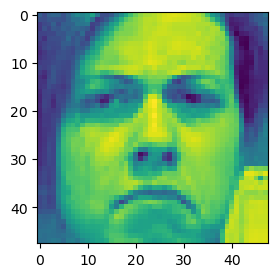

In [9]:
plt.figure(figsize=(3, 3)) 
plt.imshow(first_train_img)

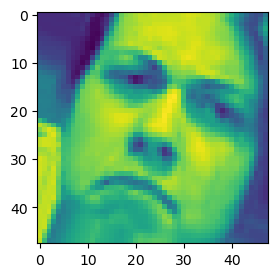

In [10]:
# take a look at the result of random transformation
plt.figure(figsize=(3, 3)) 
plt.imshow(image_generator_train.random_transform(first_train_img.reshape(img_dim)))

In [11]:
# class_mode specifies the type of label arrays that will be returned by the generator, default is None will return nothing
train_image_generator = image_generator_train.flow_from_directory(train_dir,
                                               target_size=img_dim[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               shuffle=True,
                                               class_mode='categorical')
test_image_generator = image_generator_test.flow_from_directory(test_dir,
                                               target_size=img_dim[:2],
                                                color_mode='grayscale',
                                               batch_size=batch_size,
                                               shuffle=False,
                                               class_mode='categorical')
validate_image_generator = image_generator_validate.flow_from_directory(validate_dir,
                                                        target_size=img_dim[:2],
                                                        color_mode='grayscale',
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')

Found 24502 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Found 4319 images belonging to 7 classes.


Ratio:
train - 0.7, validate - 0.15, test - 0.15

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, Lambda
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras.applications import VGG16

In [13]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.11.0


In [14]:
# Customized f1 score
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        return 2 * ((p * r) / (p + r + tf.keras.backend.epsilon()))

    def reset_states(self):
        self.precision.reset_states()
        self.recall.reset_states()

In [15]:
model = Sequential()

# must follow rules: input_shape=img_dim, model.add(Flatten()), model.add(Dense(NUM_CLASSES))

#  The input_shape parameter should only be used in the first layer of your model that receives the input data. This parameter tells the model what the shape of the input data will be. In subsequent layers, TensorFlow automatically infers the shape

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=img_dim, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(0.2))

model.add(Dense(7)) # we have 7 facial expression classes
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy',
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall'),
                       # tfa.metrics.F1Score(num_classes=7, average='weighted'),
                       metrics.AUC(name='AUCPR', curve='PR', multi_label=False),
                       metrics.AUC(name='AUCROC', curve='ROC', multi_label=False),
                       F1Score()]
                       )

2024-03-31 15:57:29.034779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 15:57:29.754140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30971 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:af:00.0, compute capability: 7.0


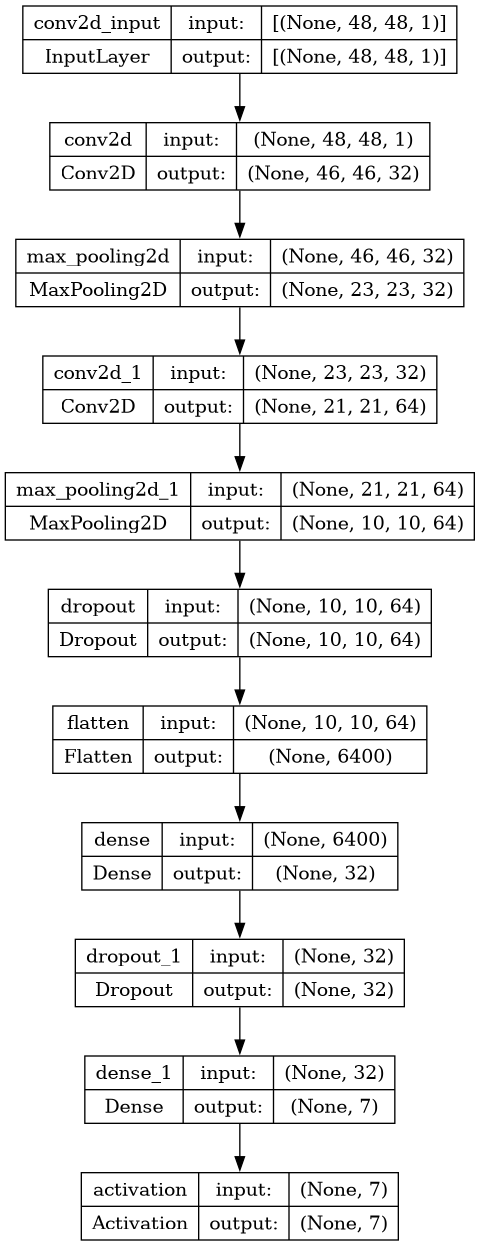

In [16]:
# Visuallize the model
# need to conda install pydot=1.4.2
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 flatten (Flatten)           (None, 6400)              0

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # Monitor validation loss
                               min_delta=0.002,  # Minimum change to qualify as an improvement
                               patience=3,
                               mode='min',  # Stop when the quantity monitored has stopped decreasing
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
# This is a model I copied from Kaggle 

# from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
# from keras.models import Model, Sequential
# from keras.optimizers import Adam

# # number of possible label values
# nb_classes = 7

# # Initialising the CNN
# model = Sequential()

# # 1 - Convolution
# model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 2nd Convolution layer
# model.add(Conv2D(128,(5,5), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 3rd Convolution layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # 4th Convolution layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# # Flattening
# model.add(Flatten())

# # Fully connected layer 1st layer
# model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# # Fully connected layer 2nd layer
# model.add(Dense(512))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# model.add(Dense(nb_classes, activation='softmax'))

# print(model.summary())

# opt = Adam(lr=0.0001)
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',
#                        metrics.Precision(name='precision'),
#                        metrics.Recall(name='recall'),
#                        # tfa.metrics.F1Score(num_classes=7, average='weighted'),
#                        metrics.AUC(name='AUCPR', curve='PR', multi_label=False),
#                        metrics.AUC(name='AUCROC', curve='ROC', multi_label=False),
#                        F1Score()])

In [1]:
results = model.fit(train_image_generator,epochs=30,
                    validation_data=validate_image_generator,
                    batch_size=batch_size,
                    verbose=1,
                    callbacks=[early_stopping]) 
model.save('fcr_cnn_mar3_mine_on_orig.h5')

In [ ]:
df = pd.DataFrame(model.history.history)
df

,loss,accuracy,precision,recall,AUCPR,AUCROC,f1_score,val_loss,val_accuracy,val_precision,val_recall,val_AUCPR,val_AUCROC,val_f1_score
0,1.743368,0.255025,0.500000,0.000083,0.228589,0.608147,0.000166,1.693814,0.286789,0.000000,0.000000,0.263096,0.655410,0.000000
1,1.713179,0.275082,0.394737,0.001243,0.249564,0.638792,0.002479,1.669279,0.306300,0.455285,0.013164,0.286663,0.671404,0.025588
2,1.696959,0.283701,0.522727,0.005719,0.264527,0.651426,0.011314,1.651446,0.306770,0.547945,0.009403,0.299252,0.679847,0.018489
3,1.680979,0.295388,0.583765,0.014007,0.280460,0.661884,0.027357,1.624383,0.338975,0.604895,0.040668,0.330269,0.697951,0.076211
4,1.672452,0.305085,0.605296,0.019891,0.292012,0.667723,0.038517,1.611788,0.358251,0.634675,0.048190,0.345531,0.709063,0.089578
5,1.660297,0.314326,0.602264,0.030873,0.304743,0.676165,0.058735,1.550910,0.391161,0.702778,0.059473,0.392116,0.738295,0.109666
6,1.641923,0.331772,0.614990,0.049646,0.324915,0.686560,0.091875,1.558814,0.376352,0.646628,0.103667,0.383718,0.732598,0.178687
7,1.628912,0.337367,0.629832,0.062119,0.336943,0.694668,0.113085,1.507605,0.410437,0.714888,0.119652,0.427735,0.758288,0.204994
8,1.625467,0.338734,0.652353,0.072397,0.343809,0.694903,0.130329,1.513667,0.407851,0.654704,0.158674,0.421545,0.751641,0.255440
9,1.616282,0.343707,0.640082,0.077162,0.349326,0.701210,0.137722,1.500292,0.400799,0.661499,0.180536,0.433363,0.754784,0.283656


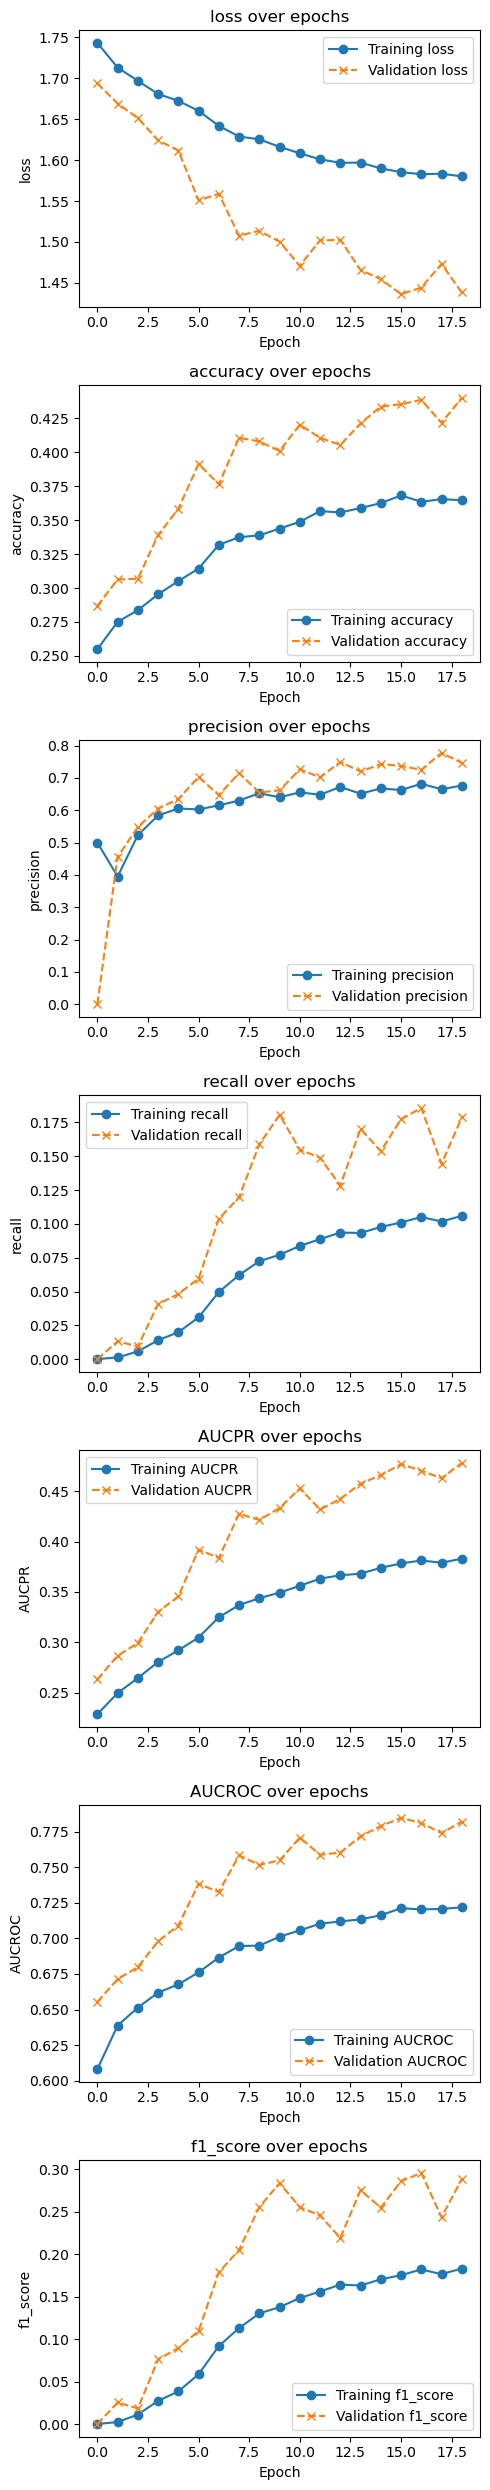

In [ ]:
# Create a figure with 7 subplots (one for each metric)
fig, axs = plt.subplots(7, 1, figsize=(5, 25))  # 7 rows, 1 column

# List of metrics to plot
metrics = ['loss', 'accuracy', 'precision', 'recall', 'AUCPR', 'AUCROC','f1_score']
# take out 'f1_score'

for i, metric in enumerate(metrics):
    # Plot training metric
    axs[i].plot(df.index, df[metric], label=f'Training {metric}', marker='o')
    
    # Plot validation metric
    val_metric = f'val_{metric}'
    axs[i].plot(df.index, df[val_metric], label=f'Validation {metric}', linestyle='--', marker='x')
    
    axs[i].set_title(f'{metric} over epochs')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel(metric)
    axs[i].legend()

# Adjust layout for better fit
plt.tight_layout()
plt.show()

1739/1739 [==============================] - 6s 3ms/step


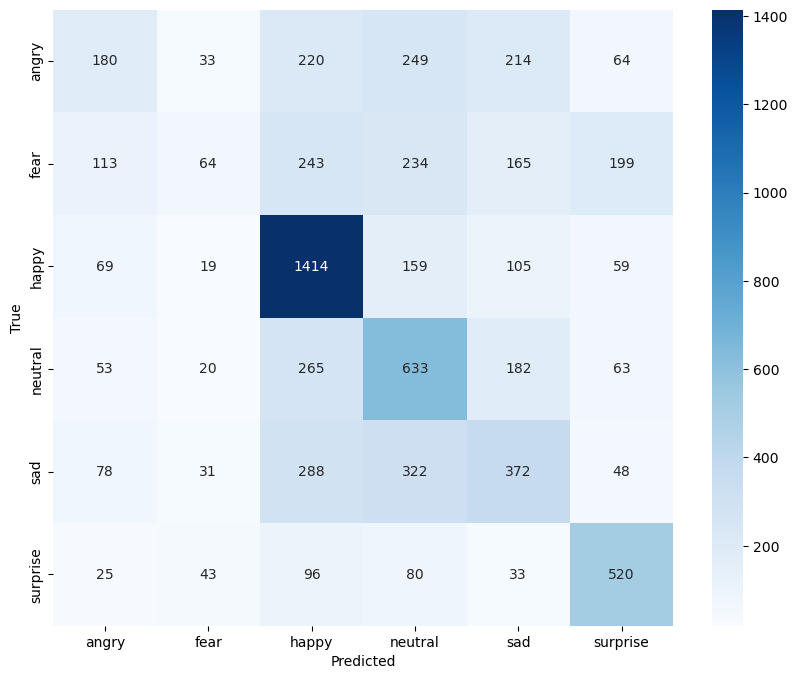

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

eval_result = model.evaluate(test_image_generator)

# Reset the generator to ensure the order of the predictions matches the labels
test_image_generator.reset()

# Predict on the entire test data
predictions = model.predict(test_image_generator, steps=test_image_generator.n // test_image_generator.batch_size + 1)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Retrieve the true class labels
true_classes = test_image_generator.classes

# Since predict_generator() can skip some samples if the dataset size isn't a multiple of the batch size,
# we trim the true_classes to match the predicted_classes length
true_classes = true_classes[:len(predicted_classes)]

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, predicted_classes)

# Assuming you have the class indices. You can get class indices from your generator
class_indices = test_image_generator.class_indices
class_labels = list(class_indices.keys())  # Class names

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()